In [1]:
%matplotlib inline

import matplotlib.pyplot as plt 
from sklearn import preprocessing, pipeline, ensemble, linear_model, model_selection
import pandas 
import numpy as np 

In [2]:
data_set = pandas.read_csv( '/Users/alex/Documents/bglb_data_set/raw_files/joined.csv', index_col=0 )
data_set = data_set.set_index( 'mutant_name' ) 

# log and relative to WT BglB 
data_set[ 'active' ] = [ 1 if k > 50000 else 0 for k in data_set.kcatkm ] 
data_set[ 'kcat' ] = data_set[ 'kcat' ].map( lambda x: np.log10( x/880.0 ) )
data_set[ 'km' ] = data_set[ 'km' ].map( lambda x: np.log10( x/5.00 ) )
data_set[ 'kcatkm' ] = data_set[ 'kcatkm' ].map( lambda x: np.log10( x/174000 ) )

data_set.sample( 2 ) 

,kcat,km,kcatkm,active
mutant_name,,,,
N163D,-1.865301,0.482588,-2.343472,0
Q313R,-0.106263,-0.145087,0.043595,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x104947e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112a0dc88>]], dtype=object)

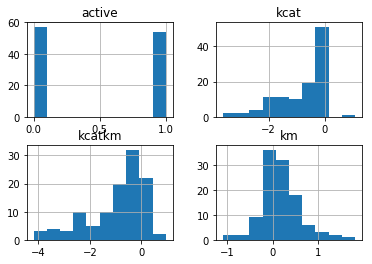

In [3]:
data_set.hist()

In [4]:
feature_set = pandas.read_csv( 'feature_sets/rosetta_runs__benchmark.csv', index_col=0 )
feature_set.shape

(209, 59)

In [5]:
J = data_set.join( feature_set ).dropna()

In [6]:
targets = ['kcat', 'km', 'kcatkm']

In [7]:
J.corr()[ targets ].drop( targets, axis=0 ).dropna()

,kcat,km,kcatkm
active,0.694607,-0.431788,0.734035
total_score,-0.177136,0.105108,-0.203251
fa_rep,0.180575,0.005053,0.159360
hbond_sc,-0.146597,0.009623,-0.143175
tot_pstat_pm,-0.050197,0.022089,-0.048925
tot_nlpstat_pm,0.243574,-0.028511,0.200905
tot_burunsat_pm,-0.106578,0.090587,-0.114822
tot_hbond_pm,0.270321,-0.106576,0.274448
tot_NLconts_pm,0.030201,-0.018045,0.027651
tot_nlsurfaceE_pm,-0.046820,-0.011178,-0.038721


In [8]:
J.head(1)

,kcat,km,kcatkm,active,total_score,fa_rep,hbond_sc,all_cst,tot_pstat_pm,tot_nlpstat_pm,...,SR_4_nlpstat_pm,SR_5,SR_5_total_score,SR_5_fa_rep,SR_5_hbond_sc,SR_5_all_cst,SR_5_interf_E_1_2,SR_5_dsasa_1_2,SR_5_hbond_pm,SR_5_burunsat_pm
A192S,0.031408,0.007748,0.028609,1,-690.141,286.403,-69.483,0.0,0.697,0.699,...,0.857,446.0,-4.651,1.068,-3.294,0.016,-9.3,0.902,7.0,1.0


In [9]:
pln = pipeline.Pipeline([
    ( 'scaler', preprocessing.MinMaxScaler() ),
    ( 'elastic_net', ensemble.BaggingRegressor( linear_model.ElasticNetCV( cv=3, max_iter=1e9, normalize=True ) ) )
]) 

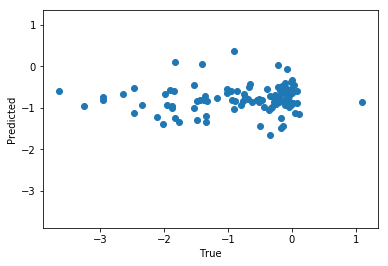

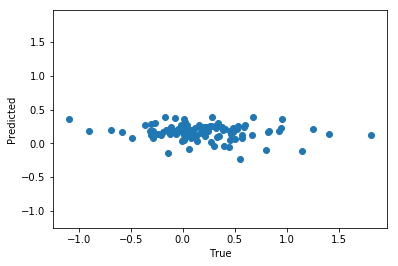

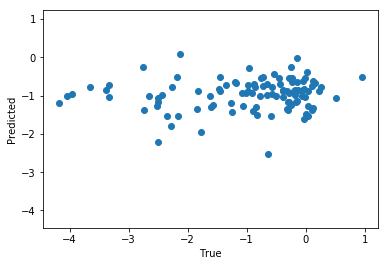

In [10]:
for tg in targets: 
    X = J.ix[:,5:]
    y = J[ tg ].ravel()
    pred = model_selection.cross_val_predict(pln, X, y, cv=3) 
    plt.scatter( y, pred ) 
    plt.xlabel( 'True' ) 
    plt.ylabel( 'Predicted' )
    plt.ylim( plt.xlim() ) 
    plt.show()

In [11]:
from sklearn import decomposition, svm, metrics

In [12]:
X = J.ix[:,5:]
y = J[ 'active' ].ravel()

In [13]:
pca = decomposition.PCA( n_components=2 ) 
pca.fit( X, y ) 

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

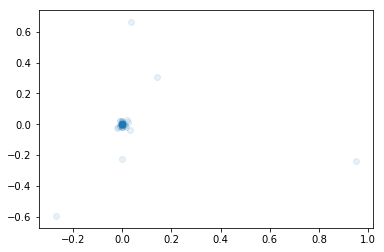

In [14]:
plt.scatter( *pca.components_, alpha=0.1 )

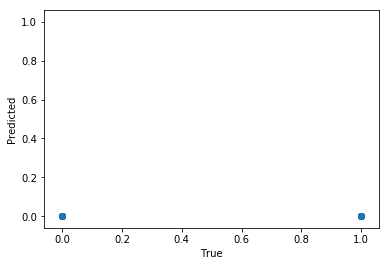

In [21]:
pln = pipeline.Pipeline([
    ( 'svm', svm.SVC(C=0.1) ),
])

pred = model_selection.cross_val_predict(pln, X, y) 

plt.scatter( y, pred ) 
plt.xlabel( 'True' ) 
plt.ylabel( 'Predicted' )
plt.ylim( plt.xlim() ) 
plt.show()

In [20]:
metrics.matthews_corrcoef( y, pred ) 

/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:516: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(var_yt * var_yp)


0.0